In [10]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import numpy as np
os.chdir("/home/jok120/protein-transformer/research/notebooks")

In [11]:
import doctest
doctest.testmod(verbose=False)

TestResults(failed=0, attempted=0)

# Analysis

In [8]:
from glob import glob
import seaborn as sns
sns.set(style="darkgrid")

In [12]:
!ls 

19-06-20 300k Hyperparameter Search.ipynb
190719 Finding Missing Residues and Atoms with Prody.ipynb
190730 Finding Gaps via Seq Alignment.ipynb
190806 Retrieving ASTRAL Chains.ipynb
190820 Poster Figures.ipynb
1a9u.cif
1a9u.cif.gz
b_casp12_07.train
checkpoints
data_aquisition.ipynb
logs
pre0523
pre190620


In [31]:
result_files = sorted(glob("*.train"))

In [32]:
def get_title(filename):
    """
     >>> get_title("logs/0613/0613-q1-0000.train")
     '0613-q1-0000'
     """
    return os.path.splitext(os.path.basename(filename))[0]

In [33]:
def get_df_from_file(f):
    df = pd.read_csv(f)
    df = df[df["is_end_of_epoch"]].reset_index()
    return df
titles = [get_title(f) for f in result_files]
dfes = (get_df_from_file(f) for f in result_files)

In [46]:
def do_plot(df, title):
    dfval = df[df["is_val"]]
    dftrain = df[df["is_val"] != True]
    sns.lineplot(x=dftrain.index, y="drmsd", data=dftrain, label="train-drmsd")
    sns.lineplot(x=dfval.index, y="drmsd", data=dfval, label="val-drmsd",color="lightblue")
#     sns.lineplot(x=dftrain.index, y="rmsd", data=dftrain, label="train-rmsd")
    sns.lineplot(x=dfval.index, y="rmsd", data=dfval, label="val-rmsd", color="orange")
    sns.lineplot(x=dftrain.index, y="rmse", data=dftrain, label="mse")
#     sns.lineplot(x=dftrain.index, y="combined", data=dftrain, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend(loc=(1.04,.7))
    plt.title("Transformer Training Loss".format(title))
    plt.savefig("figs/transtrain.pdf", pad_inches=1, bbox_inches="tight")


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


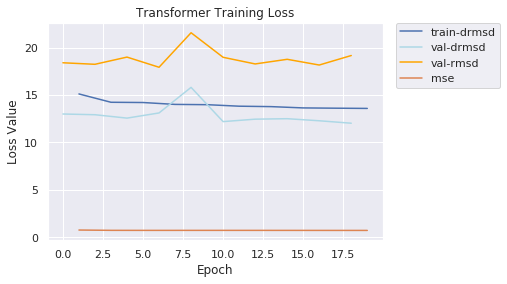

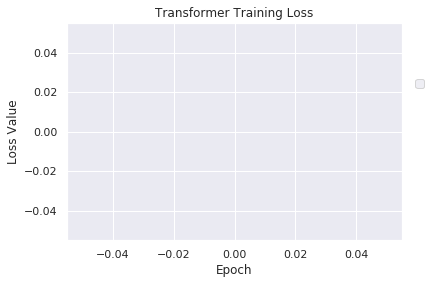

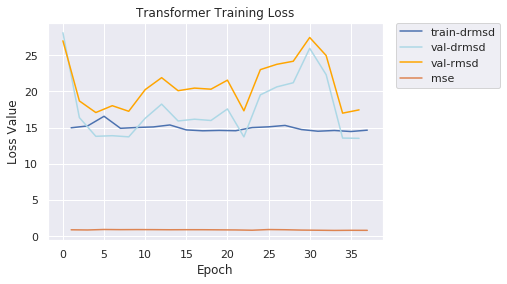

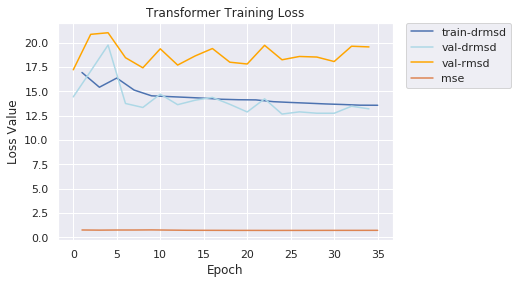

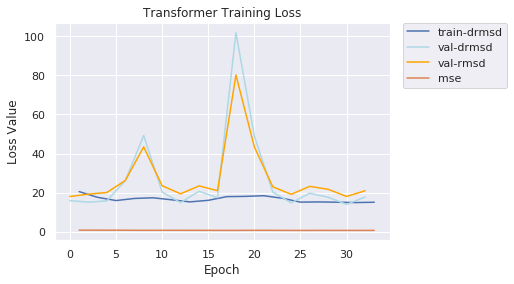

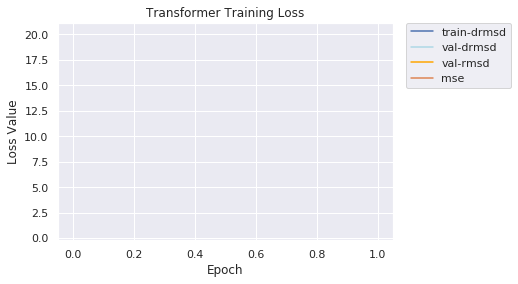

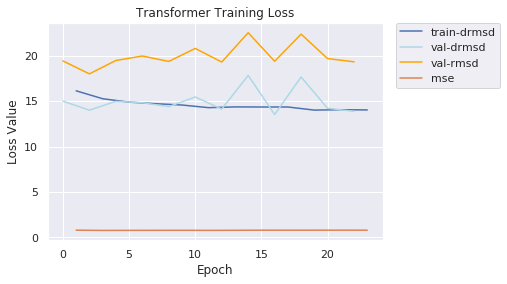

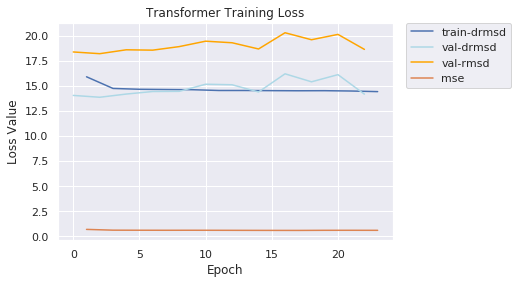

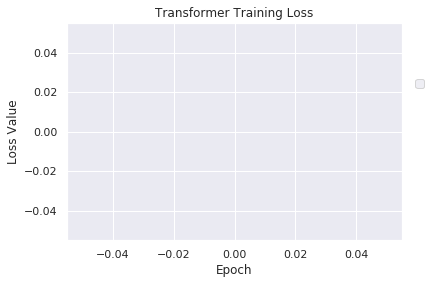

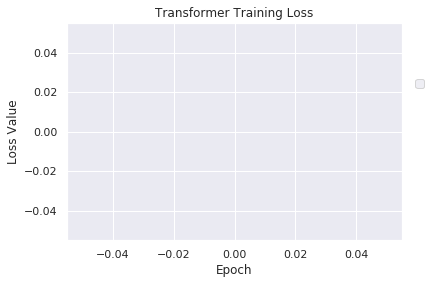

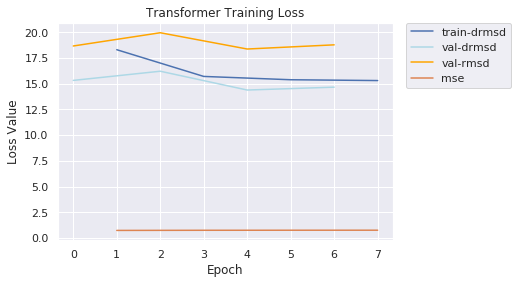

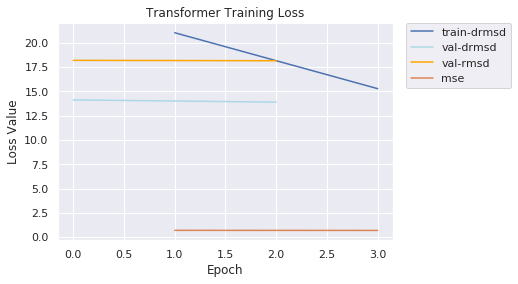

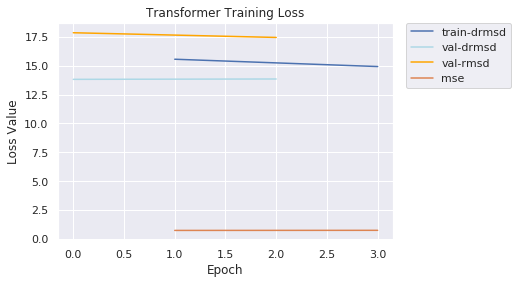

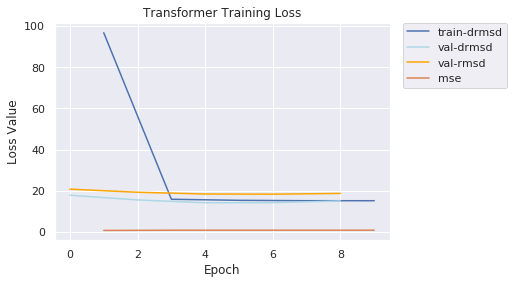

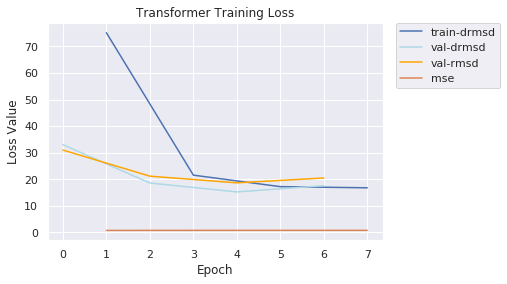

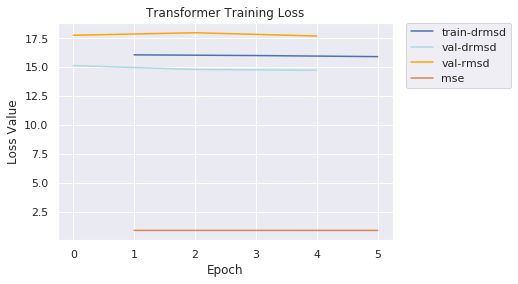

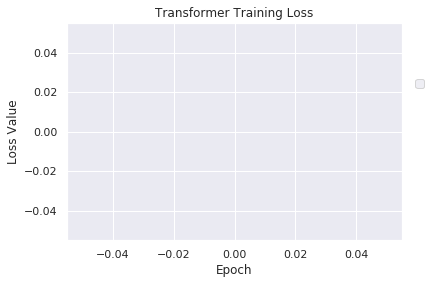

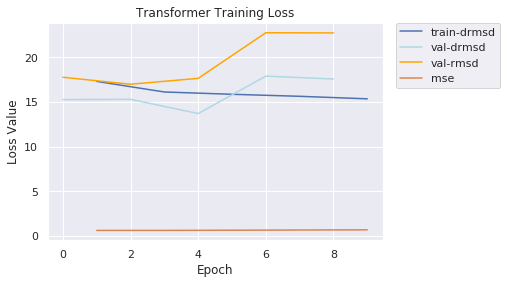

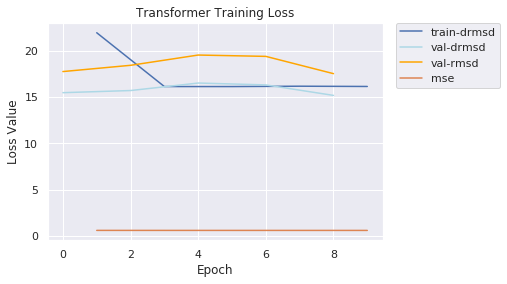

<Figure size 432x288 with 0 Axes>

In [47]:
for i in range(len(result_files)):
    try:
        do_plot(get_df_from_file(result_files[i]), titles[i])
        plt.figure()
    except:
        continue

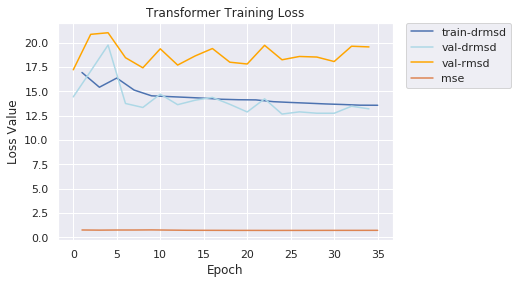

In [48]:
do_plot(get_df_from_file(result_files[3]), titles[3])

In [32]:
min_key = "rmsd"
mins = []
for df, title in zip(dfes, titles):
    try:
        dfval = df[df["is_val"]]
    except KeyError:
        continue
    try:
        row = dfval[dfval[min_key] == dfval[min_key].min()]
    except KeyError:
        print(title)
        continue
    row["title"] = title[:]
    mins.append(row)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


EmptyDataError: No columns to parse from file

In [33]:
mins_df = pd.concat(mins)
mins_df.sort_values(min_key, inplace=True)

In [34]:
mins_df

,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time,title
182,542,5.131215,1.780274,6.516320,1.113045,0,True,True,1.560501e+09,0613-q1-0241
320,956,5.481150,1.755887,6.596218,1.113357,0,True,True,1.560970e+09,0613-q1-17857
170,842,5.242279,1.819928,6.643766,1.155677,0,True,True,1.560795e+09,0613-q1-11076
366,730,4.634152,1.748475,6.666149,1.053926,0,True,True,1.560918e+09,0613-q1-15818
188,560,5.535753,1.659910,6.681239,1.034810,0,True,True,1.560850e+09,0613-q1-13129
208,620,4.957592,1.817167,6.694304,1.135373,0,True,True,1.560557e+09,0613-q1-1957
246,1222,6.025959,1.724947,6.732805,1.120483,0,True,True,1.560851e+09,0613-q1-13182
218,1082,6.112818,1.827714,6.738426,1.217186,0,True,True,1.560519e+09,0613-q1-0324
214,638,5.929736,2.066245,6.752764,1.437950,0,True,True,1.560525e+09,0613-q1-0661
770,2306,5.235391,1.765452,6.756220,1.106417,0,True,True,1.560496e+09,0613-q1-0109


In [36]:
names =  [int(t[-4:]) for t in mins_df["title"][:10]]
print(names)

[241, 7857, 1076, 5818, 3129, 1957, 3182, 324, 661, 109]


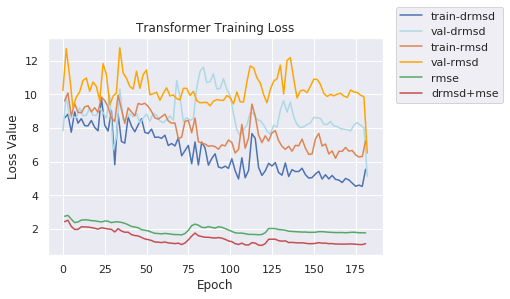

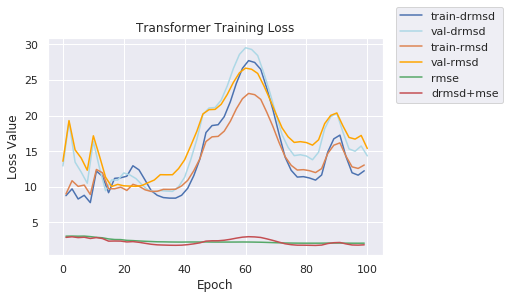

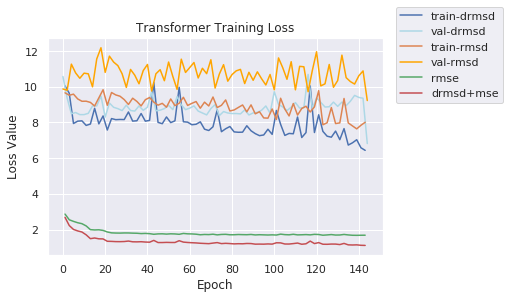

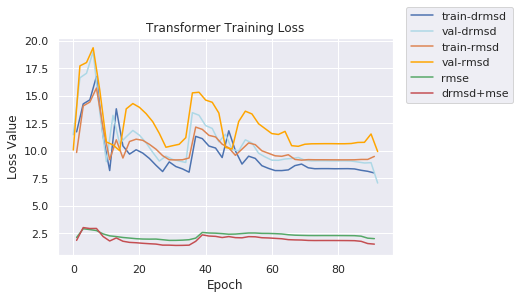

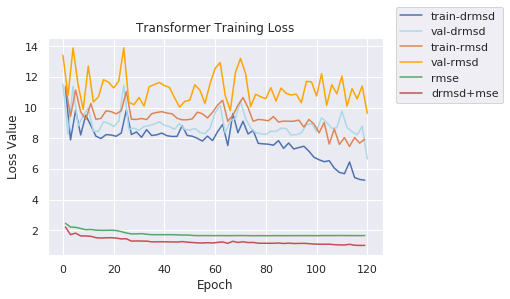

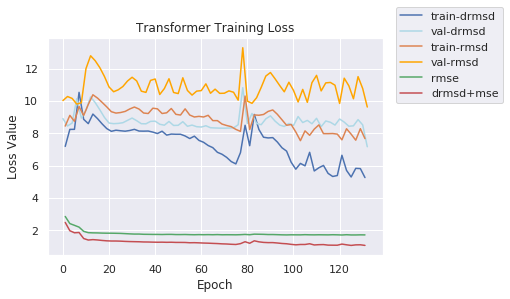

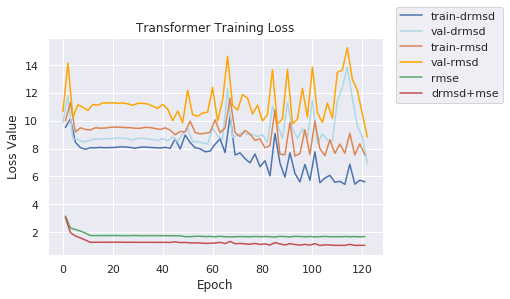

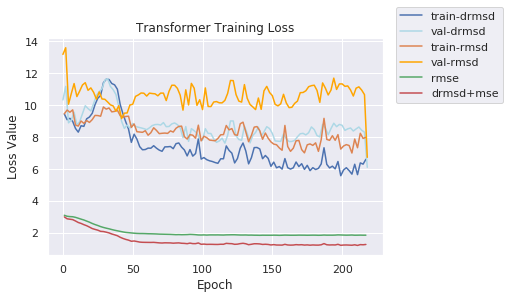

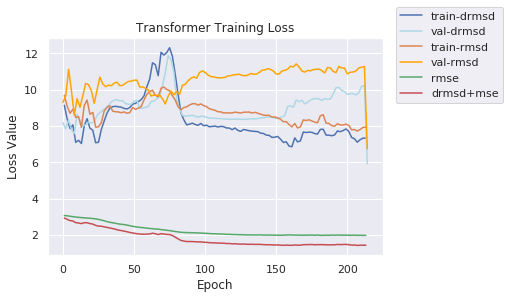

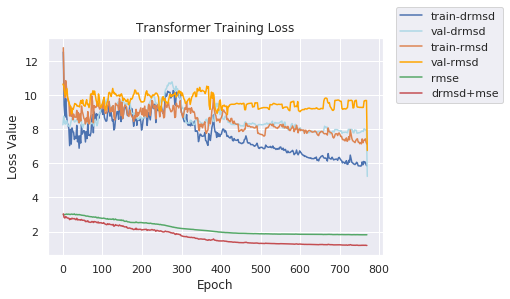

In [37]:
for n in names:
    do_plot(get_df_from_file(result_files[n]), titles[n])
    plt.show()

In [38]:
param = {"dk": [8, 20, 52, 128, 256],
         "dv": [8, 20, 52, 128, 256],
         "nh": [1, 2, 4, 6, 8],
         "nl": [1, 2, 4, 6, 8],
         "dm": [8, 16, 22, 56, 128, 256, 512],
         "cg": ["", "-cg 1", "-cg .5"],
         "lr": [1e-3, 1e-4, 1e-5, 1e-2],
         "do": [0, 0.5],
         "b": [1, 2, 4]}

In [39]:
import re

def get_arg(namespace, arg):
    pattern = f"{arg}=(.+?),"
    return re.search(pattern, namespace).group(1)

def get_arg_from_cmd(cmd_line, arg):
    if arg is "cg" and "-cg" not in cmd_line:
        return np.inf
    pattern = f"-{arg} (\S+?)($|\s|\b|\-)"
    try:
        return re.search(pattern, cmd_line).group(1)
    except AttributeError:
        if re.search(pattern, cmd_line) is None:
            print(f"'{arg}' was not found as an argument.")

In [41]:
f = open("cluster/190613.txt", "r")
lines = f.read()

In [47]:
m = re.search(".*0000.*", lines)

In [48]:
m.group(0)

'python train.py data/data_190613_query1.tch 0613-q1-0000 -e 1000 -b 1 -cl -dm 8 --early_stopping 30 -nh 1 -nl 1 -dk 8 -dv 8  -lr 0.001 -do 0'

In [50]:
f = open("cluster/190613.txt", "r")
lines = f.read()
for row in mins:
    t = row["title"].item()
    this_line = re.search(f".*{t}.*", lines).group(0)
    for a in param.keys():
        row[a] = get_arg_from_cmd(this_line, a)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [51]:
mins = pd.concat(mins)
mins.sort_values("combined", inplace=True)

In [52]:
mins

,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time,title,dk,dv,nh,nl,dm,cg,do,b
450,1346,5.254761,1.464946,7.755831,0.864939,0.001,True,True,1.560971e+09,0613-q1-17905,8,20,4,1,56,.5,0,2
534,1066,5.357565,1.471270,7.763045,0.876007,0.001,True,True,1.560907e+09,0613-q1-15314,8,20,2,1,22,.5,0,4
336,1004,5.296722,1.478160,7.553902,0.877285,0.001,True,True,1.560852e+09,0613-q1-13225,8,20,1,2,16,.5,0,2
272,812,4.891128,1.516144,7.070214,0.880369,0.0001,True,True,1.560870e+09,0613-q1-13951,8,20,1,4,128,.5,0,2
608,1214,5.301208,1.497598,7.650543,0.892026,1e,True,True,1.560570e+09,0613-q1-2414,8,8,1,8,256,1,0,4
324,968,5.417578,1.493228,7.645852,0.896031,0.001,True,True,1.560528e+09,0613-q1-0841,8,8,1,2,128,.5,0,2
416,830,5.247394,1.512627,7.757726,0.899972,0.001,True,True,1.560906e+09,0613-q1-15290,8,20,2,1,22,1,0,4
368,1100,5.158263,1.530447,7.470486,0.907959,0.0001,True,True,1.560936e+09,0613-q1-16519,8,20,2,4,256,1,0,2
346,690,5.262362,1.523633,7.456650,0.909262,0.001,True,True,1.560525e+09,0613-q1-0674,8,8,1,2,22,1,0,4
270,806,5.593435,1.499176,7.480988,0.911472,0.001,True,True,1.560526e+09,0613-q1-0745,8,8,1,2,56,1,0,2


In [ ]:
sorted(list(map(int,set(mins["d_model"]))))

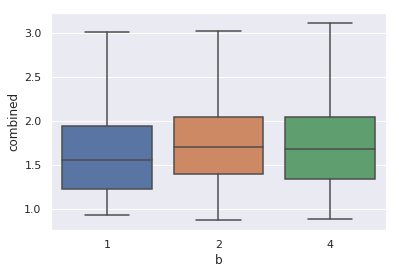

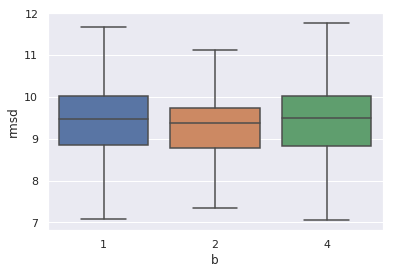

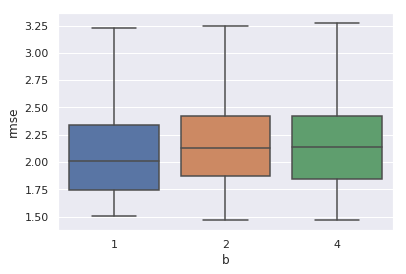

In [59]:
def do_loss_plots_on_var(d, var, swarm=True, fliers=False):
    sns.boxplot(x=var, y="combined", data=d, showfliers=fliers)
    if swarm: sns.swarmplot(x=var, y="combined", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmsd", data=d, showfliers=fliers)
    if swarm: sns.swarmplot(x=var, y="rmsd", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmse", data=d, showfliers=fliers)
    if swarm: sns.swarmplot(x=var, y="rmse", data=d, color="black")

do_loss_plots_on_var(mins, "b", swarm=False)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


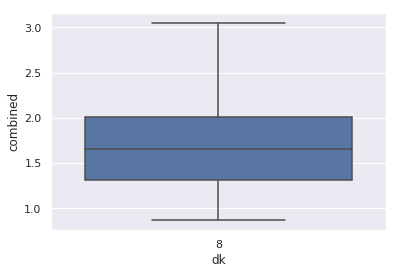

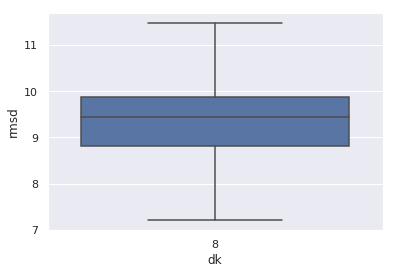

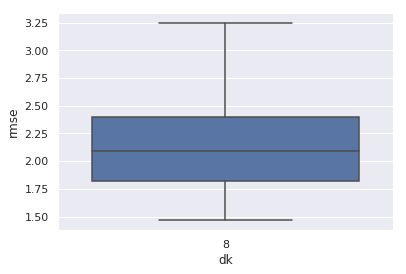

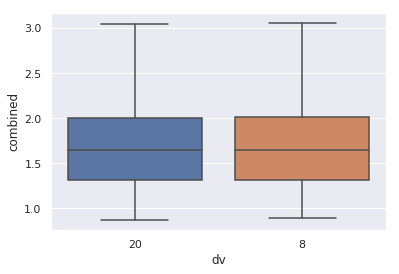

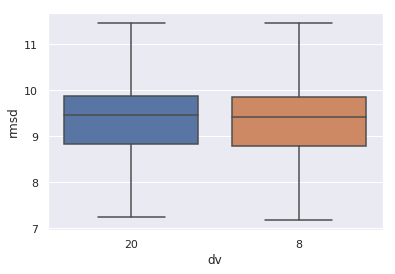

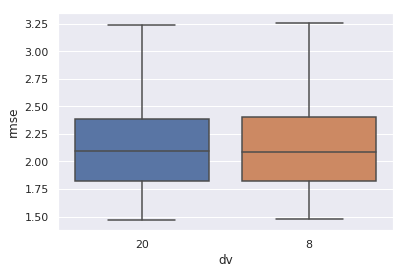

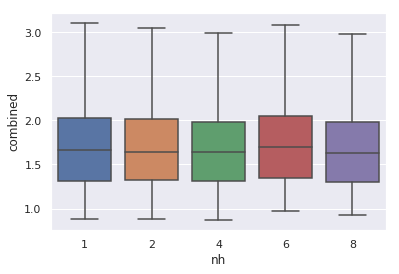

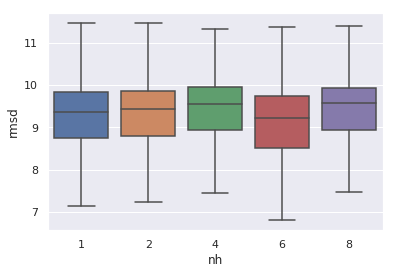

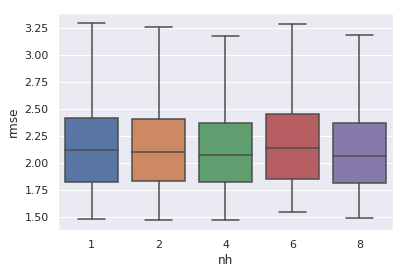

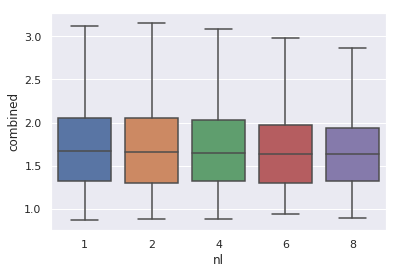

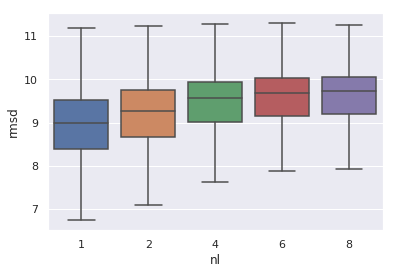

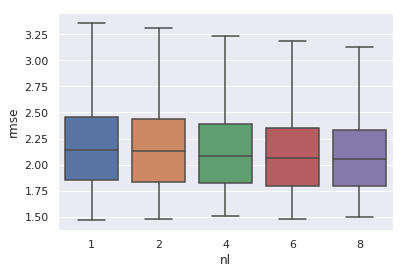

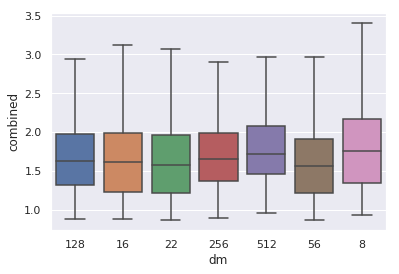

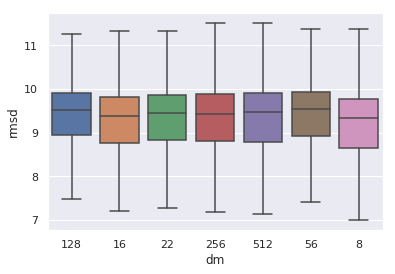

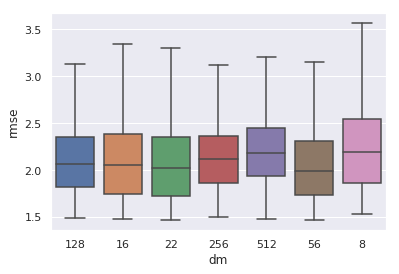

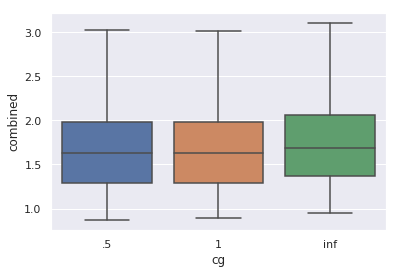

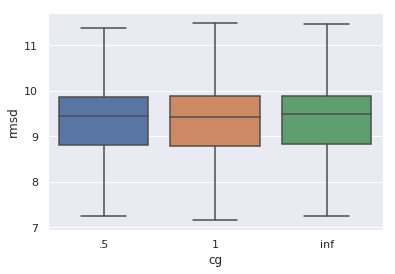

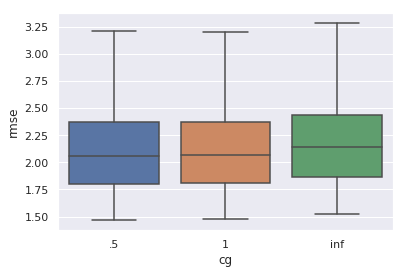

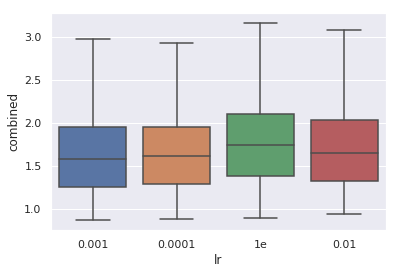

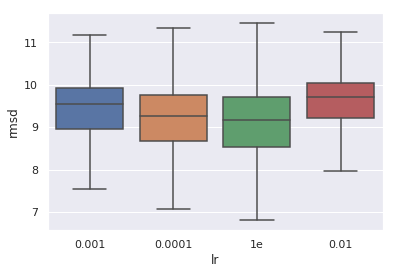

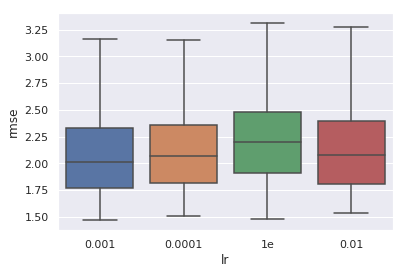

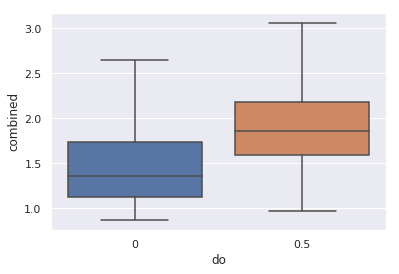

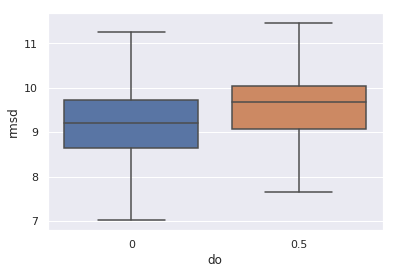

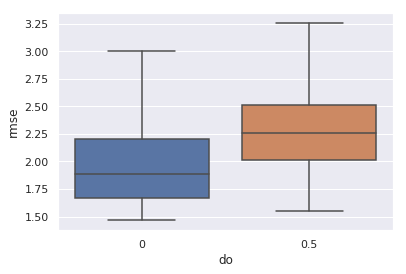

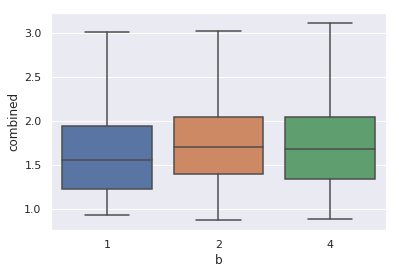

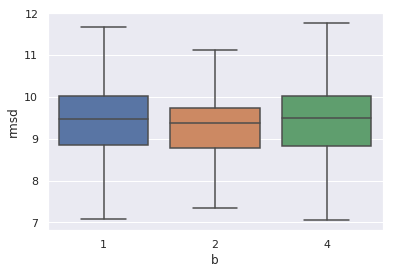

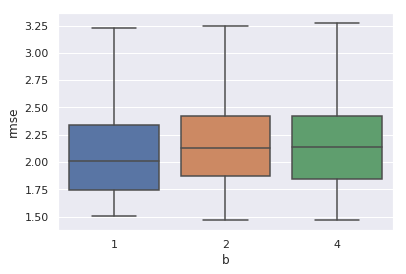

<Figure size 432x288 with 0 Axes>

In [60]:
for p in param.keys():
    do_loss_plots_on_var(mins, p, swarm=False)
    plt.figure()

In [ ]:
do_loss_plots_on_var(mins, "d_k", swarm=False)

In [ ]:
do_loss_plots_on_var(mins, "d_v", swarm=False)

In [ ]:
do_loss_plots_on_var(mins, "n_head", swarm=False)

In [ ]:
do_loss_plots_on_var(mins, "n_layers", swarm=False)

In [ ]:
summary = mins[["title", "combined", "drmsd", "rmsd", "rmse", "d_model","d_k","d_v","n_head","n_layers"]]

In [ ]:
" ".join(summary["title"][-1:].to_list())

In [ ]:
summary